# <center>**PRUEBA TÉCNICA - MARIO GARRIDO TAPIAS**</center>

### **Primer caso**:

In [1]:
muro = ((0,1), (0,2), (0,3), (0,4), (1,1), (2,1), (2,3), (3,3), (4,0), (4,1), (4,2), (4,3))

In [2]:
muro

((0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 1),
 (2, 1),
 (2, 3),
 (3, 3),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3))

In [3]:
# Función para la creación del laberinto, imprime una primera visión de él
# y crea la lista que usaremos como "matriz" para trabajar en la solución recursiva.
def creaLaberinto(muros, alto, ancho):
    laberinto = []
    for i in range(alto):
        fila = []
        print('|', end = '')
        for j in range(ancho):
            if (j == ancho - 1):
                sep = ''
            else:
                sep = ','
            if (i,j) in muros:
                print('X', end = sep)
                fila.append(0)
            else:
                print(' ', end = sep)
                fila.append(1)
        print('|')            
        laberinto.append(fila)
    return laberinto
            

In [4]:
lab = creaLaberinto(muro, 5, 5)

| ,X,X,X,X|
| ,X, , , |
| ,X, ,X, |
| , , ,X, |
|X,X,X,X, |


In [5]:
lab

[[1, 0, 0, 0, 0],
 [1, 0, 1, 1, 1],
 [1, 0, 1, 0, 1],
 [1, 1, 1, 0, 1],
 [0, 0, 0, 0, 1]]

In [6]:
# Función que busca los origenes posibles del laberinto y busca la solución (si es posible)
# para cada una de ellas
def resuelveLaberinto(laberinto, alto, ancho):
    # Buscamos los huecos libres de la primera fila
    filaUno = laberinto[0]
    origenes = []
    for j in range(ancho):
        if (filaUno[j] == 1):
            origenes.append((0, j))
    # Comenzamos la busqueda
    for origen in origenes:
        print("Comenzando desde", origen, ":")
        buscaCamino(laberinto, [origen])

In [7]:
import random
# Función recursiva que tiene en cuenta las diferentes situaciones que nos podemos encontrar.
def buscaCamino(laberinto, ruta):
    actual = ruta[-1]
        
    # Posibles direcciones (en orden): abajo, derecha, abajo, izquierda
    posiciones = [
        (actual[0] + 1, actual[1]),
        (actual[0], actual[1] + 1),
        (actual[0] - 1, actual[1]),
        (actual[0], actual[1] - 1),
    ]
    #random.shuffle(posiciones)
    
    for pos in posiciones:
        if pos[0] < 0 or pos[1] < 0 or pos[0] >= len(laberinto) or pos[1] >= len(laberinto[0]):
            continue
        elif laberinto[pos[0]][pos[1]] == 0:
            continue
        elif pos in ruta:
            continue
        elif pos[0] == len(laberinto) - 1:
            ruta.append(pos)
            pintaLaberintoFinal(ruta, laberinto)
        else:
            ruta.append(pos)
            #print("Etapa")
            #pintaLaberintoFinal(ruta, laberinto)
            buscaCamino(laberinto, ruta)
    print(" - Acabado con", actual)

In [8]:
import pandas as pd
import seaborn as sns
# Función que pinta la ruta recibida sobre el laberinto proporcionado.
def pintaLaberintoFinal(ruta, laberinto):
    for pos in ruta:
        laberinto[pos[0]][pos[1]] = 2
    for i in range(len(laberinto)):
        print('|', end = '')
        for j in range(len(laberinto[i])):
            if (j == (len(laberinto[i])) - 1):
                sep = ''
            else:
                sep = ','
            if (laberinto[i][j] == 2):
                print('*', end = sep)
            elif (laberinto[i][j] == 0):
                print('X', end = sep)
            else:
                print(' ', end = sep)
        print('|')
    # Cantidad de valores posibles
    n = 3
    # Creamos nuestra propia paleta
    colores = ["#951d03", "#1421f5", "#14f52c"]
    cmap = sns.color_palette(colores, n) 
    ax = sns.heatmap(pd.DataFrame(laberinto), cmap = cmap) 
    # Modificamos la leyenda
    colorbar = ax.collections[0].colorbar 
    r = colorbar.vmax - colorbar.vmin 
    colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
    colorbar.set_ticklabels(("Pared", "No visitado", "Ruta"))   

Comenzando desde (0, 0) :
|*,X,X,X,X|
|*,X,*,*,*|
|*,X,*,X,*|
|*,*,*,X,*|
|X,X,X,X,*|
 - Acabado con (3, 4)
 - Acabado con (2, 4)
 - Acabado con (1, 4)
 - Acabado con (1, 3)
 - Acabado con (1, 2)
 - Acabado con (2, 2)
 - Acabado con (3, 2)
 - Acabado con (3, 1)
 - Acabado con (3, 0)
 - Acabado con (2, 0)
 - Acabado con (1, 0)
 - Acabado con (0, 0)


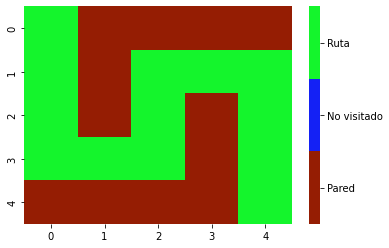

In [9]:
resuelveLaberinto(lab, 5, 5)

### **Segundo caso**:

In [10]:
muro = ((0, 0), (0, 1), (0, 3), (0, 4), (0, 6), (0, 7), (1, 0), (1, 4), (1, 6), (1, 7), (2, 0), (2, 1), (2, 2), (2, 4), (2, 5), (2, 6), (2, 7), (3, 0), (3, 2), (3, 7), (4, 0), (4, 4), (4, 5), (4, 7), (5, 0), (5, 2), (5, 3), (5, 6), (5, 7), (6, 0), (6, 2), (6, 3), (6, 5), (6, 7), (7, 0), (7, 4), (7, 7), (8, 0), (8, 1), (8, 2), (8, 6), (8, 7), (9, 0), (9, 1), (9, 3), (9, 5), (9, 7), (10, 0), (10, 5), (10, 7), (11, 0), (11, 2), (11, 3), (11, 4), (11, 6), (11, 7))

In [11]:
lab2 = creaLaberinto(muro, 12, 8)

|X,X, ,X,X, ,X,X|
|X, , , ,X, ,X,X|
|X,X,X, ,X,X,X,X|
|X, ,X, , , , ,X|
|X, , , ,X,X, ,X|
|X, ,X,X, , ,X,X|
|X, ,X,X, ,X, ,X|
|X, , , ,X, , ,X|
|X,X,X, , , ,X,X|
|X,X, ,X, ,X, ,X|
|X, , , , ,X, ,X|
|X, ,X,X,X, ,X,X|


In [12]:
lab2

[[0, 0, 1, 0, 0, 1, 0, 0],
 [0, 1, 1, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0],
 [0, 1, 0, 1, 1, 1, 1, 0],
 [0, 1, 1, 1, 0, 0, 1, 0],
 [0, 1, 0, 0, 1, 1, 0, 0],
 [0, 1, 0, 0, 1, 0, 1, 0],
 [0, 1, 1, 1, 0, 1, 1, 0],
 [0, 0, 0, 1, 1, 1, 0, 0],
 [0, 0, 1, 0, 1, 0, 1, 0],
 [0, 1, 1, 1, 1, 0, 1, 0],
 [0, 1, 0, 0, 0, 1, 0, 0]]

Comenzando desde (0, 2) :
 - Acabado con (9, 2)
|X,X,*,X,X, ,X,X|
|X, ,*,*,X, ,X,X|
|X,X,X,*,X,X,X,X|
|X, ,X,*, , , ,X|
|X,*,*,*,X,X, ,X|
|X,*,X,X, , ,X,X|
|X,*,X,X, ,X, ,X|
|X,*,*,*,X, , ,X|
|X,X,X,*,*, ,X,X|
|X,X,*,X,*,X, ,X|
|X,*,*,*,*,X, ,X|
|X,*,X,X,X, ,X,X|
 - Acabado con (10, 1)
 - Acabado con (10, 2)
 - Acabado con (10, 3)
 - Acabado con (10, 4)
 - Acabado con (9, 4)
 - Acabado con (6, 6)
 - Acabado con (7, 6)
 - Acabado con (7, 5)
 - Acabado con (8, 5)
 - Acabado con (8, 4)
 - Acabado con (8, 3)
 - Acabado con (7, 3)
 - Acabado con (7, 2)
 - Acabado con (7, 1)
 - Acabado con (6, 1)
 - Acabado con (5, 1)
 - Acabado con (3, 1)
 - Acabado con (4, 1)
 - Acabado con (4, 2)
 - Acabado con (4, 3)
 - Acabado con (4, 6)
 - Acabado con (3, 6)
 - Acabado con (3, 5)
 - Acabado con (3, 4)
 - Acabado con (3, 3)
 - Acabado con (2, 3)
 - Acabado con (1, 3)
 - Acabado con (1, 1)
 - Acabado con (1, 2)
 - Acabado con (0, 2)
Comenzando desde (0, 5) :
 - Acabado con (1, 5)
 - Acabado con (0, 5)


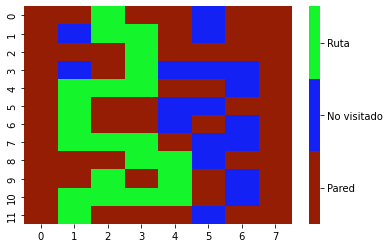

In [13]:
resuelveLaberinto(lab2, 12, 8)